# Creating runoff_maps.nc for interactive freshwater forcing simulations
Returns: runoff_maps.nc with Antarctica removed

In [1]:
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from maps import proj_GrIS
from constants import spy

In [2]:
exp_name = 'ECE3'

ECEARTH_SRC_DIR = '/perm/nk0j/ecearth3-cmip6/sources'
RUN_DIR = f'/ec/res4/scratch/nk0j/ecearth3-cmip6/{exp_name}'
INI_DATA_DIR='/ec/res4/hpcperm/nm6/ece3data'

In [3]:
# Read original runoff_maps.nc to dataset
data_dir = '/perm/nk0j/ece3data'
runoff_file = f'{data_dir}/runoff-mapper/runoff_maps.nc'
output_file = f'{data_dir}/runoff-mapper/runoff_maps_fwfAIS.nc'
print(runoff_file)
ds = xr.open_dataset(runoff_file)
ds

/perm/nk0j/ece3data/runoff-mapper/runoff_maps.nc


<xarray.Dataset>
Dimensions:            (lon: 512, lat: 256)
Coordinates:
  * lon                (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * lat                (lat) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
Data variables:
    drainage_basin_id  (lat, lon) int32 ...
    arrival_point_id   (lat, lon) int32 ...
    calving_point_id   (lat, lon) int32 ...
Attributes:
    ece-origin:  Klaus Wyser (SMHI) for EC-Earth

# Greenland plots

/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


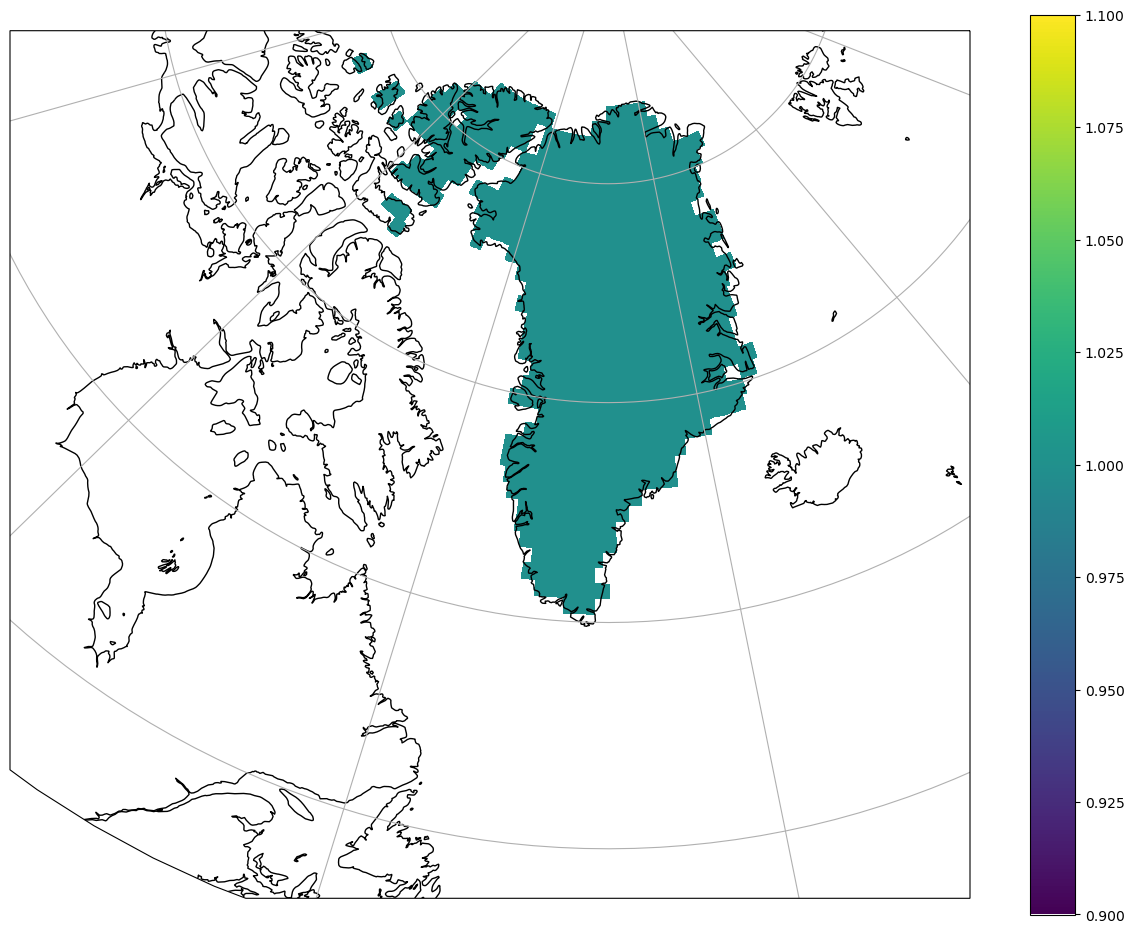

In [4]:
# Plot Greenland drainage basin
f = plt.figure(figsize=(12,9), constrained_layout=True)
ax = f.add_axes([0,0,1,1], projection=ccrs.LambertConformal(**{'central_latitude': 72,
 'central_longitude': -42,
 'standard_parallels': [66, 78],
 'cutoff': 45}))
ax.set_extent([-80,-20,20,86])
im = ax.pcolormesh(ds.lon, ds.lat,
              ds.drainage_basin_id.where(ds.drainage_basin_id==1),\
              transform=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
plt.colorbar(im)

/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


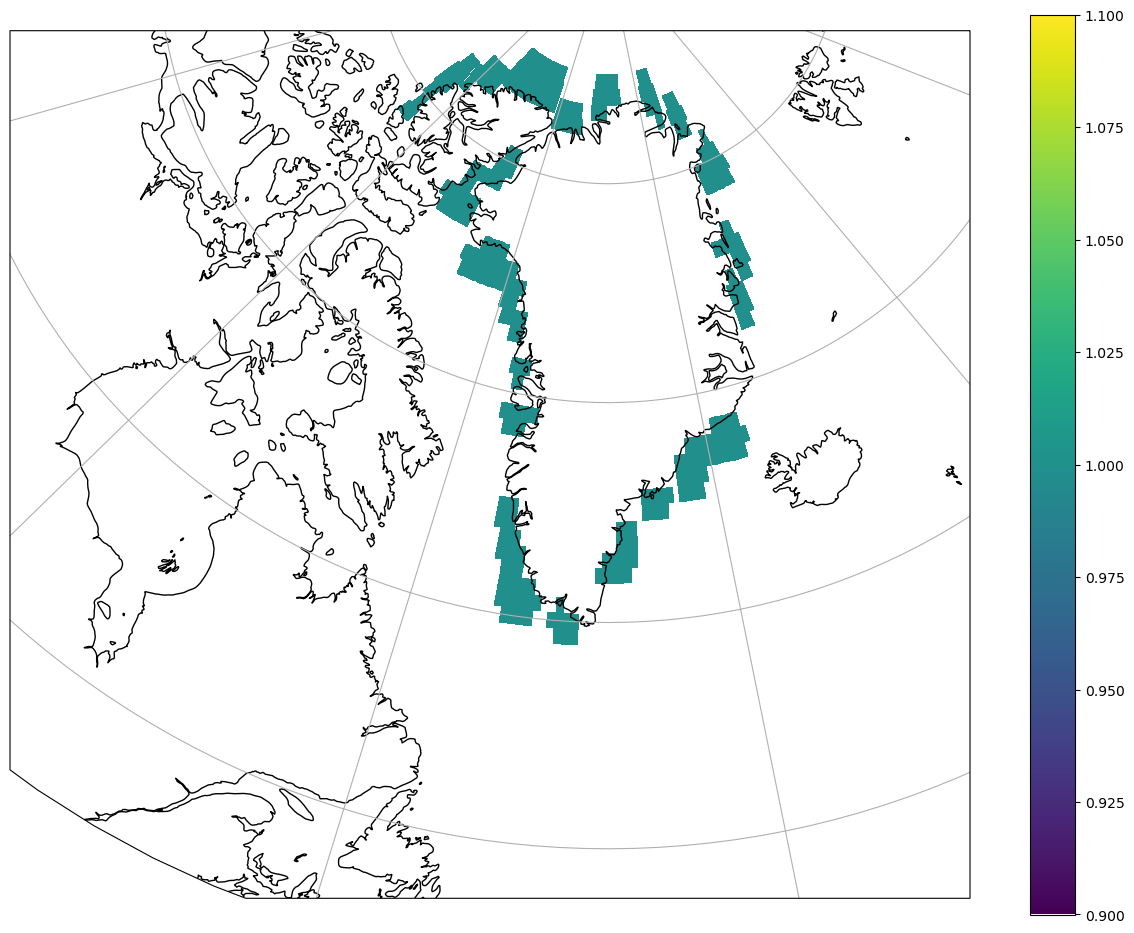

In [5]:
# Plot Greenland arrival point
f = plt.figure(figsize=(12,9), constrained_layout=True)
ax = f.add_axes([0,0,1,1], projection=ccrs.LambertConformal(**{'central_latitude': 72,
 'central_longitude': -42,
 'standard_parallels': [66, 78],
 'cutoff': 45}))
ax.set_extent([-80,-20,20,86])
im = ax.pcolormesh(ds.lon, ds.lat,
              ds.arrival_point_id.where(ds.arrival_point_id==1),\
              transform=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
plt.colorbar(im)

/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  func(*args, **kwargs)
/perm/nk0j/miniconda3/envs/ecearth/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


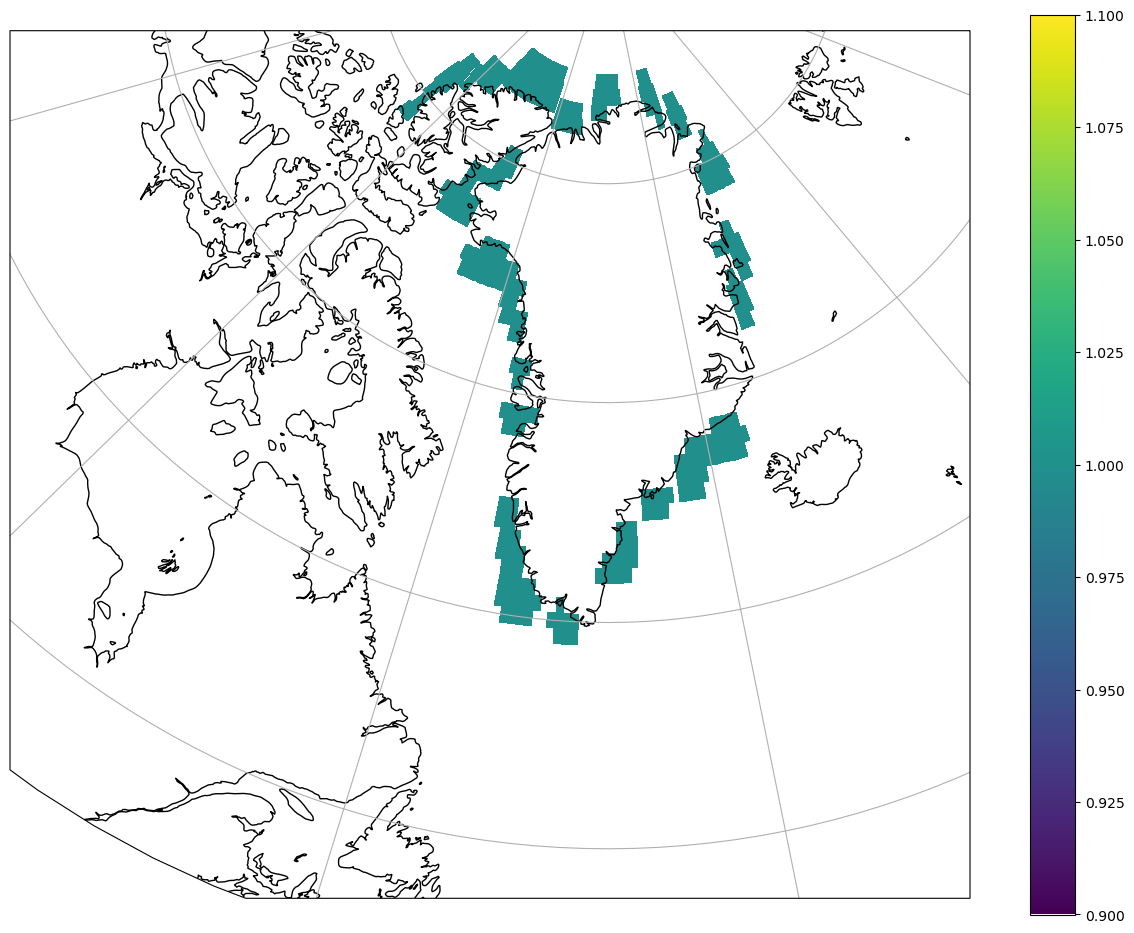

In [6]:
# Plot Greenland calving point
f = plt.figure(figsize=(12,9), constrained_layout=True)
ax = f.add_axes([0,0,1,1], projection=ccrs.LambertConformal(**{'central_latitude': 72,
 'central_longitude': -42,
 'standard_parallels': [66, 78],
 'cutoff': 45}))
ax.set_extent([-80,-20,20,86])
im = ax.pcolormesh(ds.lon, ds.lat,
              ds.calving_point_id.where(ds.calving_point_id==1),\
              transform=ccrs.PlateCarree())
ax.gridlines()
ax.coastlines()
plt.colorbar(im)

# Arrival point plots: Greenland and Antarctica

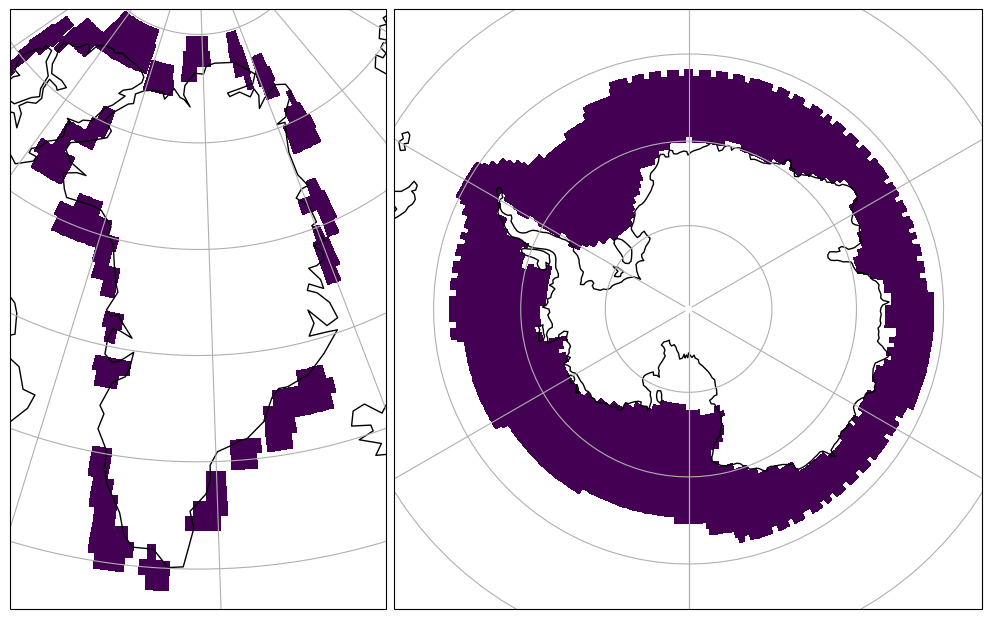

In [7]:
# creating figure
f = plt.figure(figsize=(10,6))
ax1 = f.add_axes([0,0,.39,1], projection=ccrs.LambertConformal(**proj_GrIS))
ax1.set_extent([-58,-26,57,86])
ax1.pcolormesh(ds.lon, ds.lat, ds.arrival_point_id.where(ds.arrival_point_id==1),
                shading='auto', transform=ccrs.PlateCarree())

ax2 = f.add_axes([.38,0,.61,1], projection=ccrs.SouthPolarStereo())
ax2.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax2.pcolormesh(ds.lon, ds.lat, ds.arrival_point_id.where(ds.arrival_point_id==66),
                shading='auto', transform=ccrs.PlateCarree())

for ax in [ax1,ax2]:
    ax.coastlines(resolution='110m')
    ax.gridlines()

In [8]:
ds

<xarray.Dataset>
Dimensions:            (lon: 512, lat: 256)
Coordinates:
  * lon                (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * lat                (lat) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
Data variables:
    drainage_basin_id  (lat, lon) int32 66 66 66 66 66 66 ... -2 -2 -2 -2 -2 -2
    arrival_point_id   (lat, lon) int32 -1 -1 -1 -1 -1 -1 ... -2 -2 -2 -2 -2 -2
    calving_point_id   (lat, lon) int32 -1 -1 -1 -1 -1 -1 ... -2 -2 -2 -2 -2 -2
Attributes:
    ece-origin:  Klaus Wyser (SMHI) for EC-Earth

In [9]:
# Remove Antarctica
ds_new = ds.where(ds!=66)
ds_new

<xarray.Dataset>
Dimensions:            (lat: 256, lon: 512)
Coordinates:
  * lon                (lon) float64 0.0 0.7031 1.406 ... 357.9 358.6 359.3
  * lat                (lat) float64 -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
Data variables:
    drainage_basin_id  (lat, lon) float64 nan nan nan nan ... -2.0 -2.0 -2.0
    arrival_point_id   (lat, lon) float64 -1.0 -1.0 -1.0 -1.0 ... -2.0 -2.0 -2.0
    calving_point_id   (lat, lon) float64 -1.0 -1.0 -1.0 -1.0 ... -2.0 -2.0 -2.0
Attributes:
    ece-origin:  Klaus Wyser (SMHI) for EC-Earth

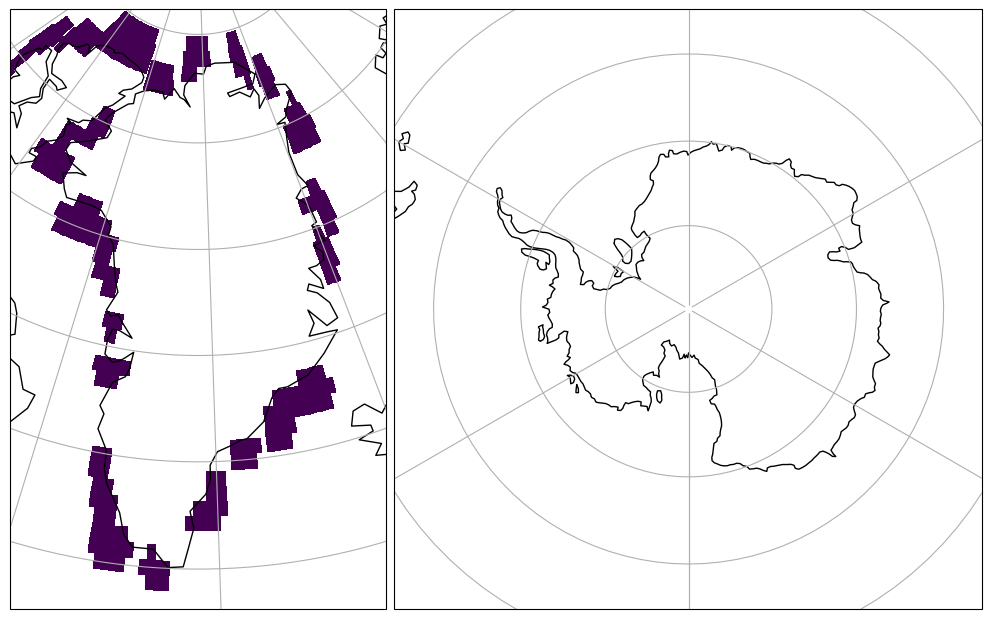

In [10]:
# creating figure
f = plt.figure(figsize=(10,6))
ax1 = f.add_axes([0,0,.39,1], projection=ccrs.LambertConformal(**proj_GrIS))
ax1.set_extent([-58,-26,57,86])
ax1.pcolormesh(ds_new.lon, ds_new.lat, ds_new.arrival_point_id.where(ds_new.arrival_point_id==1),
                shading='auto', transform=ccrs.PlateCarree())

ax2 = f.add_axes([.38,0,.61,1], projection=ccrs.SouthPolarStereo())
ax2.set_extent([-180,180,-90,-55], ccrs.PlateCarree())
ax2.pcolormesh(ds_new.lon, ds_new.lat, ds_new.arrival_point_id.where(ds_new.arrival_point_id==66),
                shading='auto', transform=ccrs.PlateCarree())

for ax in [ax1,ax2]:
    ax.coastlines(resolution='110m')
    ax.gridlines()

In [11]:
print(output_file)
ds_new.to_netcdf(output_file)

/perm/nk0j/ece3data/runoff-mapper/runoff_maps_fwfAIS.nc


In [ ]:
# Just Antarctica
ds_runoff_map_AIS = ds.where(ds==66)
ds_runoff_map_AIS.to_netcdf('runoff_map_AIS.nc')